# Testing Deep learning models (CNN, RNN, LSTM) for sentiment analysis

In [4]:
import tensorflow as tf
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/omen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/omen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('./data/darija_reviews_cleaned.csv')
X = df['cleaned_review'].astype(str).values
y = df['rating'].values

In [6]:
df['cleaned_review'] = df['cleaned_review'].astype(str)

tokenized_reviews = [word_tokenize(review) for review in df['cleaned_review']]

model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=1000, window=5, min_count=1, workers=4)

model_word2vec.save("output/word2vec.model")

In [ ]:
model_word2vec = Word2Vec.load("./models/output/word2vec_model.model")

tokenized_reviews = [word_tokenize(review) for review in df['cleaned_review']]

review_vectors = [np.mean([model_word2vec.wv[token] for token in review], axis=0) for review in tokenized_reviews]
review_vectors = np.array(review_vectors)
review_vectors_word2vec = np.nan_to_num(review_vectors)



In [11]:
tfidf = TfidfVectorizer()

tfidf.fit(df['cleaned_review'])

review_vectors_tfidf = tfidf.transform(df['cleaned_review']).toarray()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(review_vectors_tfidf, y, test_size=0.2, random_state=42)

In [13]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(X_train.shape[0], 128),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

conv_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                   optimizer=tf.keras.optimizers.Adam(1e-4),
                   metrics=['mse'])

conv_model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=1,use_multiprocessing=True)

2024-01-27 20:41:40.859636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 20:41:40.886621: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 20:41:40.886988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 20:41:40.889567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 20:41:40.889797: I tensorflow/compile

Epoch 1/60


2024-01-27 20:41:42.822932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-01-27 20:41:43.149869: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-27 20:41:43.545269: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-27 20:41:43.978886: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f23fc9fd560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-27 20:41:43.978930: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-01-27 20:41:43.986720: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-27 20:41:44.082112: I ./tensorflow/compiler/jit/

70/70 [==============================] - 4s 23ms/step - loss: 16.9159 - mse: 16.9159 - val_loss: 13.6751 - val_mse: 13.6751
Epoch 2/60
70/70 [==============================] - 1s 16ms/step - loss: 9.4903 - mse: 9.4903 - val_loss: 4.7849 - val_mse: 4.7849
Epoch 3/60
70/70 [==============================] - 1s 16ms/step - loss: 2.4994 - mse: 2.4994 - val_loss: 1.4470 - val_mse: 1.4470
Epoch 4/60
70/70 [==============================] - 1s 16ms/step - loss: 1.4207 - mse: 1.4207 - val_loss: 1.4250 - val_mse: 1.4250
Epoch 5/60
70/70 [==============================] - 1s 20ms/step - loss: 1.4178 - mse: 1.4178 - val_loss: 1.4281 - val_mse: 1.4281
Epoch 6/60
70/70 [==============================] - 2s 23ms/step - loss: 1.4174 - mse: 1.4174 - val_loss: 1.4252 - val_mse: 1.4252
Epoch 7/60
70/70 [==============================] - 2s 23ms/step - loss: 1.4188 - mse: 1.4188 - val_loss: 1.4249 - val_mse: 1.4249
Epoch 8/60
70/70 [==============================] - 2s 23ms/step - loss: 1.4185 - mse: 1.4

Lowest validation loss: 1.4244110584259033
Epoch of lowest validation loss: 47


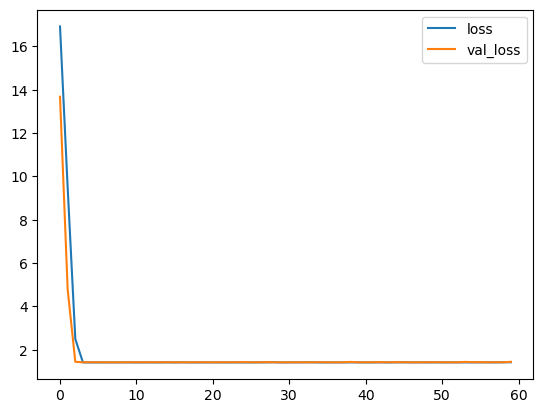

In [14]:
plt.plot(conv_model.history.history['loss'], label='loss')
plt.plot(conv_model.history.history['val_loss'], label='val_loss')
plt.legend()
print(f'Lowest validation loss: {min(conv_model.history.history["val_loss"])}')
print(f'Epoch of lowest validation loss: {np.argmin(conv_model.history.history["val_loss"])+1}')

18/18 [==============================] - 0s 17ms/step


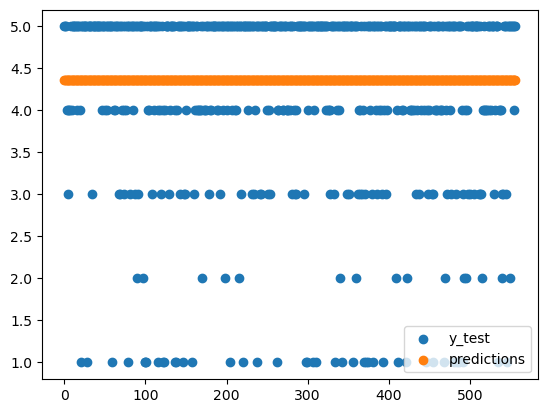

In [15]:
predictions = conv_model.predict(X_test)

plt.scatter(range(len(y_test)), y_test, label='y_test')
plt.scatter(range(len(predictions)), predictions, label='predictions')
plt.legend()

# LSTM

In [ ]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(X_train.shape[0], 128),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mse'])

lstm_model.summary()

lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1,use_multiprocessing=True)

1/1 [==============================] - 0s 39ms/step


array([[4.250547]], dtype=float32)

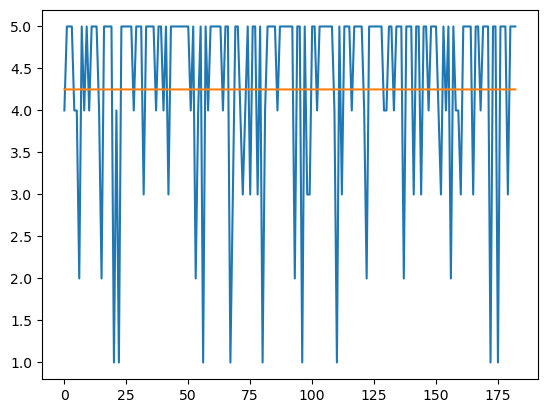

In [ ]:
predictions = lstm_model.predict(X_test)

plt.plot( y_test, label='y_test')
plt.plot( predictions, label='predictions')

text = "3jbni produit mzyan"
text = tfidf.transform([text]).toarray()
lstm_model.predict(text)

In [ ]:
# Tokenize the data


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
vocab_size = len(word_index)
print(vocab_size)

1352


In [ ]:
# Create sequences
sequences = tokenizer.texts_to_sequences(X)
# get sequence max length
max_length = max([len(s.split()) for s in X])
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
len(padded[0])

42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((732, 42), (732,), (183, 42), (183,))

In [ ]:



# Create the model
dense_network = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size+1, 32, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='linear')
])



opt = Adam()

# Compile the model
dense_network.compile(loss=tf.keras.losses.MeanSquaredError(),
                     optimizer=opt,
                     metrics=['mse'])

# Train the model
history = dense_network.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
23/23 [==============================] - 2s 70ms/step - loss: 17.9354 - mse: 17.9354 - val_loss: 15.9219 - val_mse: 15.9219
Epoch 2/100
23/23 [==============================] - 2s 71ms/step - loss: 16.5948 - mse: 16.5948 - val_loss: 15.3426 - val_mse: 15.3426
Epoch 3/100
23/23 [==============================] - 1s 49ms/step - loss: 16.1912 - mse: 16.1912 - val_loss: 14.6439 - val_mse: 14.6439
Epoch 4/100
23/23 [==============================] - 1s 26ms/step - loss: 15.3798 - mse: 15.3798 - val_loss: 13.5272 - val_mse: 13.5272
Epoch 5/100
23/23 [==============================] - 1s 28ms/step - loss: 14.3131 - mse: 14.3131 - val_loss: 12.8048 - val_mse: 12.8048
Epoch 6/100
23/23 [==============================] - 1s 25ms/step - loss: 14.6837 - mse: 14.6837 - val_loss: 12.0140 - val_mse: 12.0140
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 13.6211 - mse: 13.6211 - val_loss: 11.7502 - val_mse: 11.7502
Epoch 8/100
23/23 [=============================

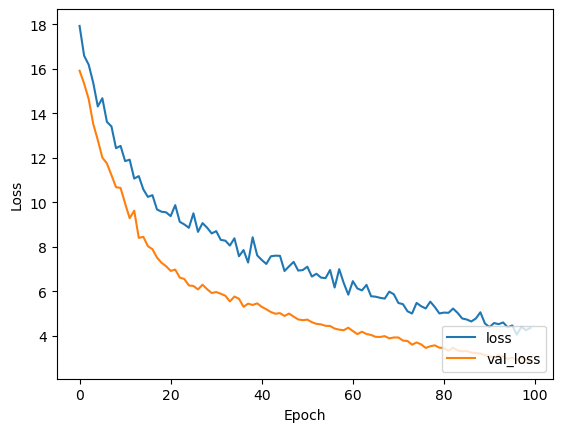

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='lower right')


6/6 [==============================] - 0s 2ms/step


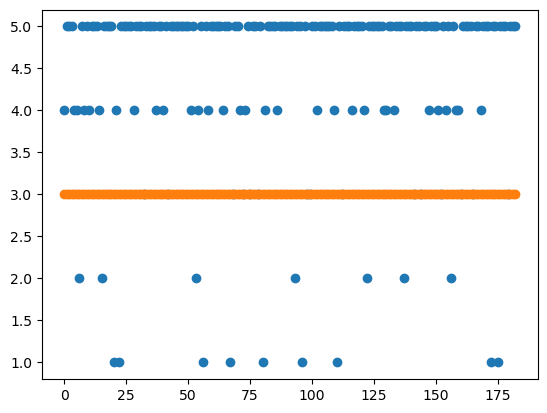

In [ ]:
predictions = dense_network.predict(X_test)

plt.scatter(range(len(y_test)), y_test, label='y_test')
plt.scatter(range(len(predictions)), np.round(predictions), label='predictions')

In [ ]:
text = 'le produit est zwin bzaaf'
input = tokenizer.texts_to_sequences([text])
input = pad_sequences(input, maxlen=max_length, padding='post', truncating='post')

dense_network.predict(input)

1/1 [==============================] - 0s 17ms/step


array([[3.1677506]], dtype=float32)